### Simple Regression Example

In [1]:
import pandas as pd
import numpy as np

In [17]:
df = pd.DataFrame({'x': [34, 35, 39, 42, 43, 47],
                   'y': [102, 109, 137, 148, 150, 158]})

In [18]:
df

,x,y
0,34,102
1,35,109
2,39,137
3,42,148
4,43,150
5,47,158


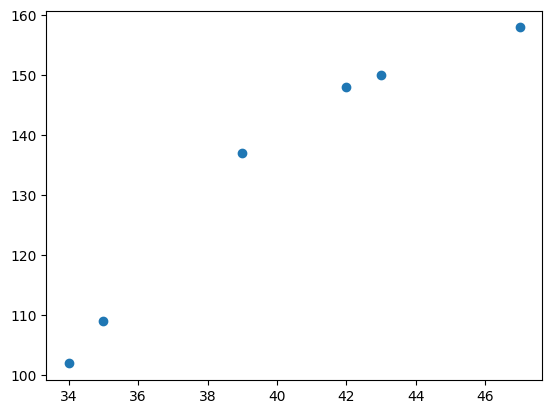

In [19]:
import matplotlib.pyplot as plt

plt.scatter(df['x'], df['y'])

What we need:
+ For beta 0 (the intercept) the equation is yhat - beta1 *(mean of x)

+ For beta 1 we need the sum of ((x - x mean)(y - y mean)) / sum(x - x mean)^2

In [20]:
x_mean = round(df['x'].mean(), 0)
x_mean

np.float64(40.0)

In [21]:
y_mean = round(df['y'].mean(), 0)
y_mean

np.float64(134.0)

In [24]:
x_result = df['x'].apply(lambda x:x - x_mean)

In [25]:
x_result

0   -6.0
1   -5.0
2   -1.0
3    2.0
4    3.0
5    7.0
Name: x, dtype: float64

In [26]:
y_result = df['y'].apply(lambda y: y - y_mean)
y_result

0   -32.0
1   -25.0
2     3.0
3    14.0
4    16.0
5    24.0
Name: y, dtype: float64

In [29]:
obs_mean = pd.DataFrame({'x_result': x_result, 'y_result': y_result})
obs_mean

,x_result,y_result
0,-6.0,-32.0
1,-5.0,-25.0
2,-1.0,3.0
3,2.0,14.0
4,3.0,16.0
5,7.0,24.0


In [30]:
b1_numerator = (obs_mean['x_result'] * obs_mean['y_result']).sum()

In [31]:
b1_numerator

np.float64(558.0)

In [46]:
b1_denominator = sum(x_result**2)

In [47]:
b1_denominator

124.0

In [48]:
b1_numerator / b1_denominator

np.float64(4.5)

In [49]:
# this is our beta1 coefficient
beta_1 = b1_numerator / b1_denominator
beta_1


np.float64(4.5)

In [50]:
# intercept term
beta_0 = y_mean - beta_1*x_mean
beta_0

np.float64(-46.0)

#### Simple Linear Regression

In [51]:
ads = pd.read_csv('../data/Advertising.csv')
ads.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


<Axes: xlabel='total', ylabel='sales'>

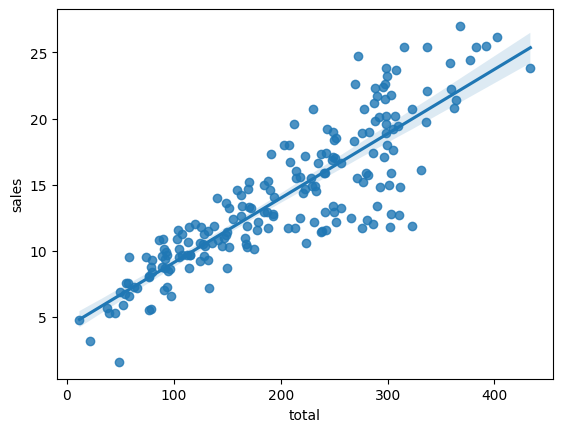

In [ ]:
import seaborn as sns

# create total advertising 
ads['total'] = ads['TV'] + ads['newspaper'] + ads['radio']

# use regplot for regression line for simple linear regression
sns.regplot(data = ads, x = 'total', y = 'sales')

In [54]:
# split
X = ads['total']
y = ads['sales']

# use numpy to get the line - returns highest order to least so the intercept comes last
line = np.polyfit(x = X, y=y, deg = 1)
line

array([0.04868788, 4.24302822])

In [56]:
beta_1 = line[0]
beta_0 = line[1]

In [57]:
# make predictions on this data
new_data = np.linspace(0, 500, 100)

predictions = beta_0 + beta_1 * new_data

In [ ]:
# 100 predictions
predictions

array([ 4.24302822,  4.4889266 ,  4.73482498,  4.98072336,  5.22662174,
        5.47252012,  5.7184185 ,  5.96431688,  6.21021526,  6.45611364,
        6.70201202,  6.9479104 ,  7.19380878,  7.43970716,  7.68560554,
        7.93150392,  8.1774023 ,  8.42330068,  8.66919906,  8.91509744,
        9.16099582,  9.4068942 ,  9.65279258,  9.89869097, 10.14458935,
       10.39048773, 10.63638611, 10.88228449, 11.12818287, 11.37408125,
       11.61997963, 11.86587801, 12.11177639, 12.35767477, 12.60357315,
       12.84947153, 13.09536991, 13.34126829, 13.58716667, 13.83306505,
       14.07896343, 14.32486181, 14.57076019, 14.81665857, 15.06255695,
       15.30845533, 15.55435371, 15.80025209, 16.04615048, 16.29204886,
       16.53794724, 16.78384562, 17.029744  , 17.27564238, 17.52154076,
       17.76743914, 18.01333752, 18.2592359 , 18.50513428, 18.75103266,
       18.99693104, 19.24282942, 19.4887278 , 19.73462618, 19.98052456,
       20.22642294, 20.47232132, 20.7182197 , 20.96411808, 21.21

Now we have a regression line created from our data. We can see how this line fits from a range of (0, 500) with our original data. This is what seaborn did for us above.

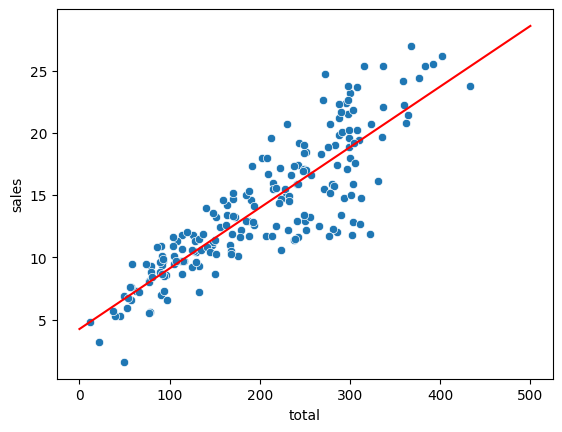

In [66]:
sns.scatterplot(x = 'total', y = 'sales', data = ads)
plt.plot(new_data, predictions, color = 'red')

What would our predicted sales be for 300 dollars in total advertising?

In [67]:
# plug it in to our equation
this_sale = 300

# prediction
pred = beta_0 + this_sale * beta_1
pred

np.float64(18.84939201175077)

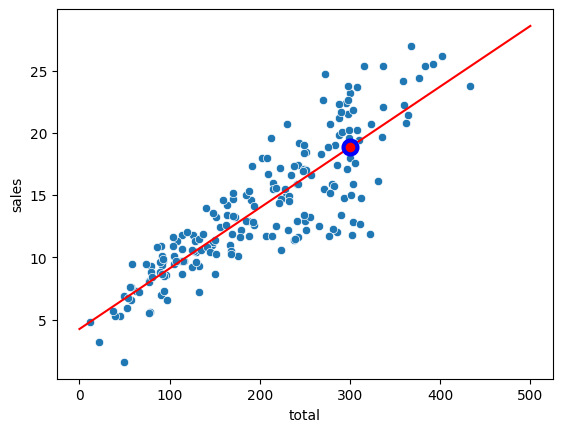

In [87]:
# add the prediction to the graph
sns.scatterplot(x = 'total', y = 'sales', data = ads)
plt.plot(new_data, predictions, color = 'red')
plt.plot(300, pred, marker = 'o', ms = 10,
              markerfacecolor = 'red', markeredgewidth = 3,
              markeredgecolor = 'blue')

If we were to fit a polynomial equation we would get different values for the intercept and for beta_1. The smaller the coefficient, the weaker the releationship so when we run the code we see that beta_3 is a very small number because this has a linear relationship and not a polynomial relationship. The following code will have the equation form:

+ $$b3*x^3 + b2*x^2 + b1*x + b0$$

In [91]:
poly = np.polyfit(X, y, deg = 3)

When we add polynomial coefficients we will start to get curves in our line.

In [96]:
# polynomial example

# 100 examples
polynomial_spending = np.linspace(0, 500, 100)

# predictions for those spending values
poly_pred = poly[0] * polynomial_spending**3 + poly[1] * polynomial_spending**2 + poly[2] * polynomial_spending + poly[3]

<Axes: xlabel='total', ylabel='sales'>

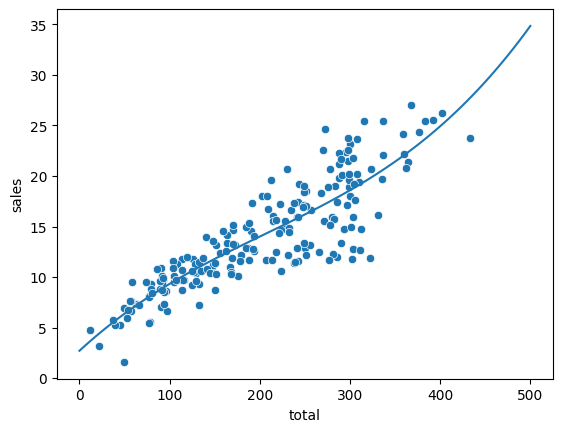

In [97]:
# graph this new curve on to the original data
plt.plot(polynomial_spending, poly_pred)
sns.scatterplot(x = 'total', y = 'sales', data = ads)